- n = [800, 1200, 2000] / 400

- indp = N
- z_dis = gaussian, uniform
- noise_dis = gaussian, t, cauchy
- dz=1
- alpha=2

In [1]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *


def ecit_simu(n_list=[400,800,2000,4000],
              t=100,
              cit=kcit,
              ensembles=[(p_alpha175,1), (p_alpha175,2), (p_alpha175,400)],
              show_progress=True,
              dz=1,n_indp='N',z_dis='gaussian',noise_dis='gaussian',noise_std=0.3,fun1=None,fun2=None):
    
    results = []

    for p_ensemble, k in ensembles:

        if show_progress: print(f"Ensemble (k={k}, {p_ensemble.__name__})") if k>1 else print(f"Default (k=1)")

        eI = [0]*len(n_list)
        eII = [0]*len(n_list)
        tim = [0]*len(n_list)

        for i, n in enumerate(n_list):

            start_time = time.time()
            iteration_loop = tqdm(range(t), desc=f"n={n}", leave=True, dynamic_ncols=True) if show_progress else range(t)
            for sed in iteration_loop:
                np.random.seed(sed)
                random.seed(sed)
                dataI = np.hstack((generate_samples(n=n,dz=dz,indp='C',z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                    fun1=fun1, fun2=fun1)))
                dataII = np.hstack((generate_samples(n=n,dz=dz,indp=n_indp,z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                     fun1=fun1, fun2=fun1)))
                obj_ECIT = ECIT(dataI, cit, p_ensemble, k if k<100 else int(n/k))
                pI = obj_ECIT([0], [1], [2])
                obj_ECIT = ECIT(dataII, cit, p_ensemble, k if k<100 else int(n/k))
                pII = obj_ECIT([0], [1], [2])
                if pI<0.05:
                    eI[i] += 1
                if pII>0.05:
                    eII[i] += 1

            end_time = time.time()
            tim[i] = end_time - start_time
            eI[i] = eI[i]/t
            eII[i] = eII[i]/t

        results.append([eI, eII, tim])

    return results




def show_results(results, ensembles, n_list):
    dir = {}
    for (p_ensemble, k), result in zip(ensembles, results):
        key_name = f"Ensemble (k={k}, {p_ensemble.__name__})" if k > 1 else f"Default (k=1)"
        dir[key_name] = result

    fig, axes = plt.subplots(2, 2, figsize=(16, 10), dpi=300, sharex=True)
    (ax_eI, ax_eII), (ax_eSum, ax_tim) = axes

    for label, result in dir.items():
        eI, eII, tim = result
        eSum = np.array(eI) + np.array(eII)

        ax_eI.plot(n_list, eI, label=label)
        ax_eII.plot(n_list, eII)
        ax_eSum.plot(n_list, eSum)
        ax_tim.plot(n_list, tim)

    ax_eI.set_title("Error I")
    ax_eI.set_ylabel("Error Rate")

    ax_eII.set_title("Error II")

    ax_eSum.set_title("Error I + Error II")
    ax_eSum.set_xlabel("Sample Size (n)")   
    ax_eSum.set_ylabel("Error Rate")


    ax_tim.set_title("Execution Time")
    ax_tim.set_ylabel("Time (s)")
    ax_tim.set_xlabel("Sample Size (n)")

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=12)

    ax_tim.set_xticks(n_list)
    ax_eSum.set_xticks(n_list)

    plt.tight_layout()
    plt.show()

2025-01-13 14:23:12.379415: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-13 14:23:12.396035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736749392.415096   39786 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736749392.420952   39786 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-13 14:23:12.440860: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [ ]:
n_list = [800, 1200, 2000]
ensembles = [(p_alpha2, 1), (p_alpha2, 400), (p_alpha2, 200)]
t = 1000
cit = kcit

Default (k=1)


n=2000: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [3:12:44<00:00, 11.56s/it]


Ensemble (k=400, p_alpha2)


n=2000: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [17:09<00:00,  1.03s/it]


Ensemble (k=200, p_alpha2)


n=2000: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [14:01<00:00,  1.19it/s]


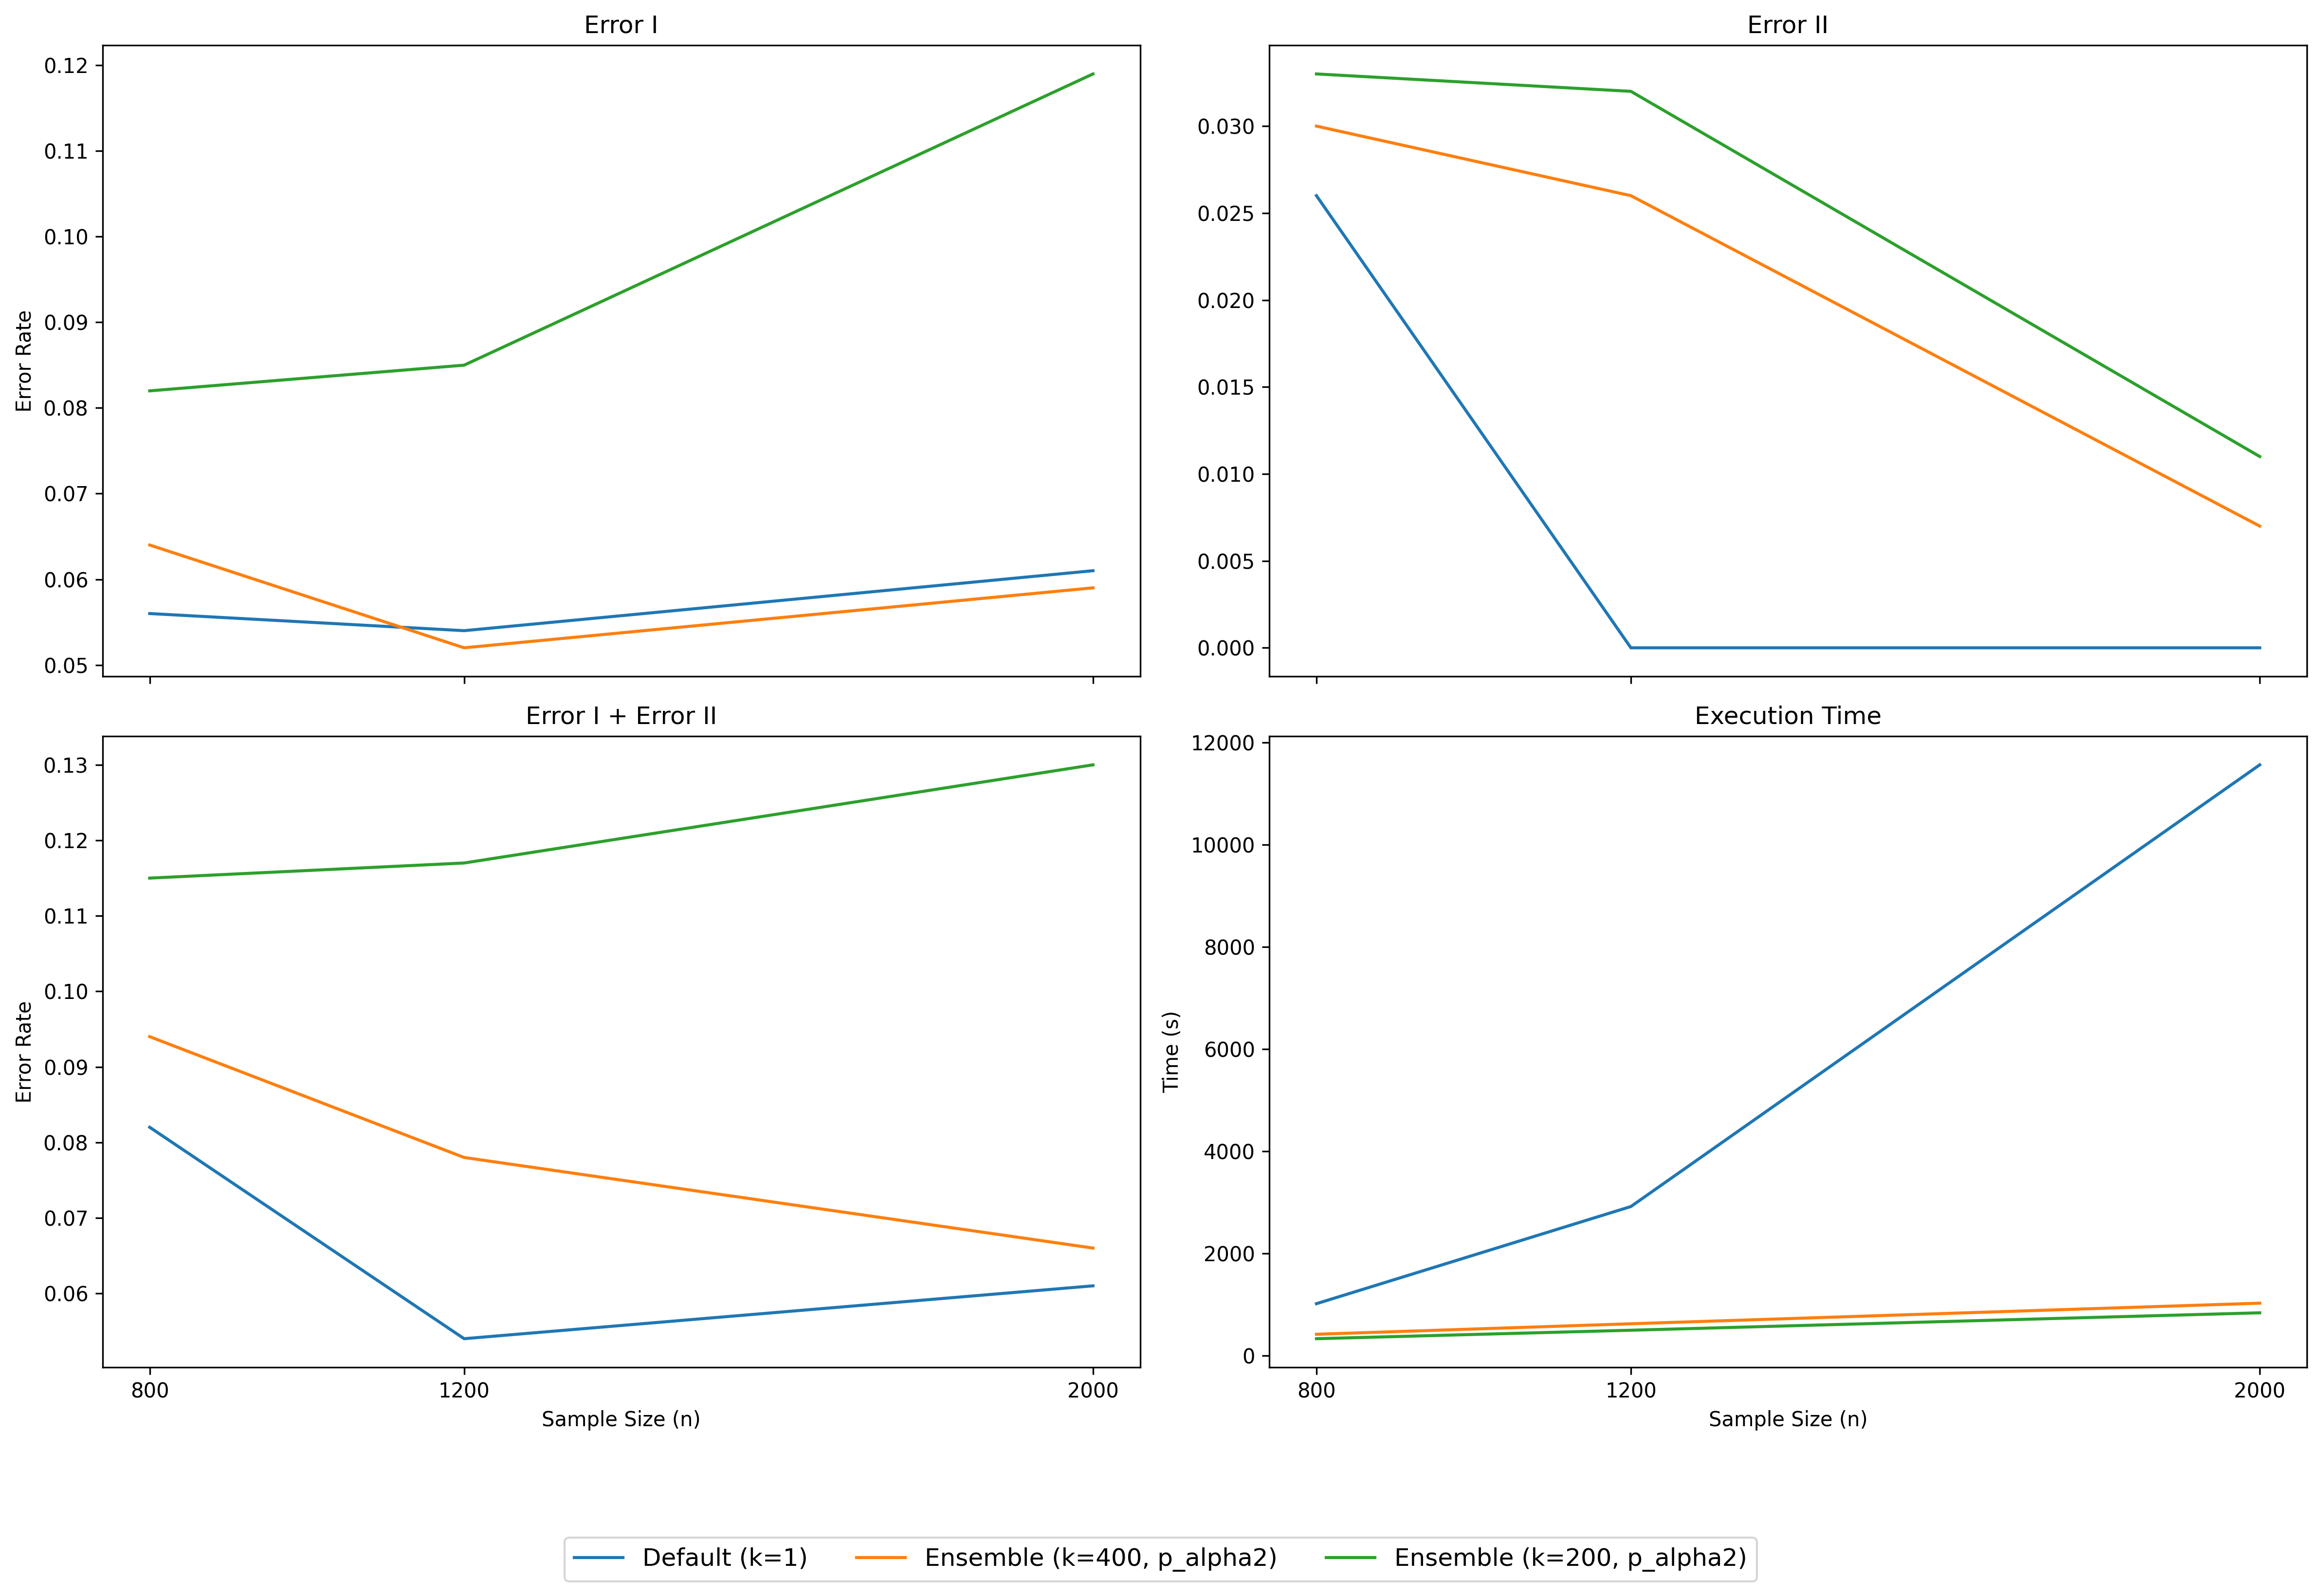

[[[0.056, 0.054, 0.061],
  [0.026, 0.0, 0.0],
  [1020.0183234214783, 2920.7240743637085, 11564.311199903488]],
 [[0.064, 0.052, 0.059],
  [0.03, 0.026, 0.007],
  [421.55105090141296, 626.8590154647827, 1029.8824067115784]],
 [[0.082, 0.085, 0.119],
  [0.033, 0.032, 0.011],
  [334.8797194957733, 500.6008756160736, 841.4600780010223]]]

In [3]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=1,z_dis='gaussian',noise_dis='gaussian',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=2000: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [3:06:24<00:00, 11.18s/it]


Ensemble (k=400, p_alpha2)


n=2000: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [16:49<00:00,  1.01s/it]


Ensemble (k=200, p_alpha2)


n=2000: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [13:27<00:00,  1.24it/s]


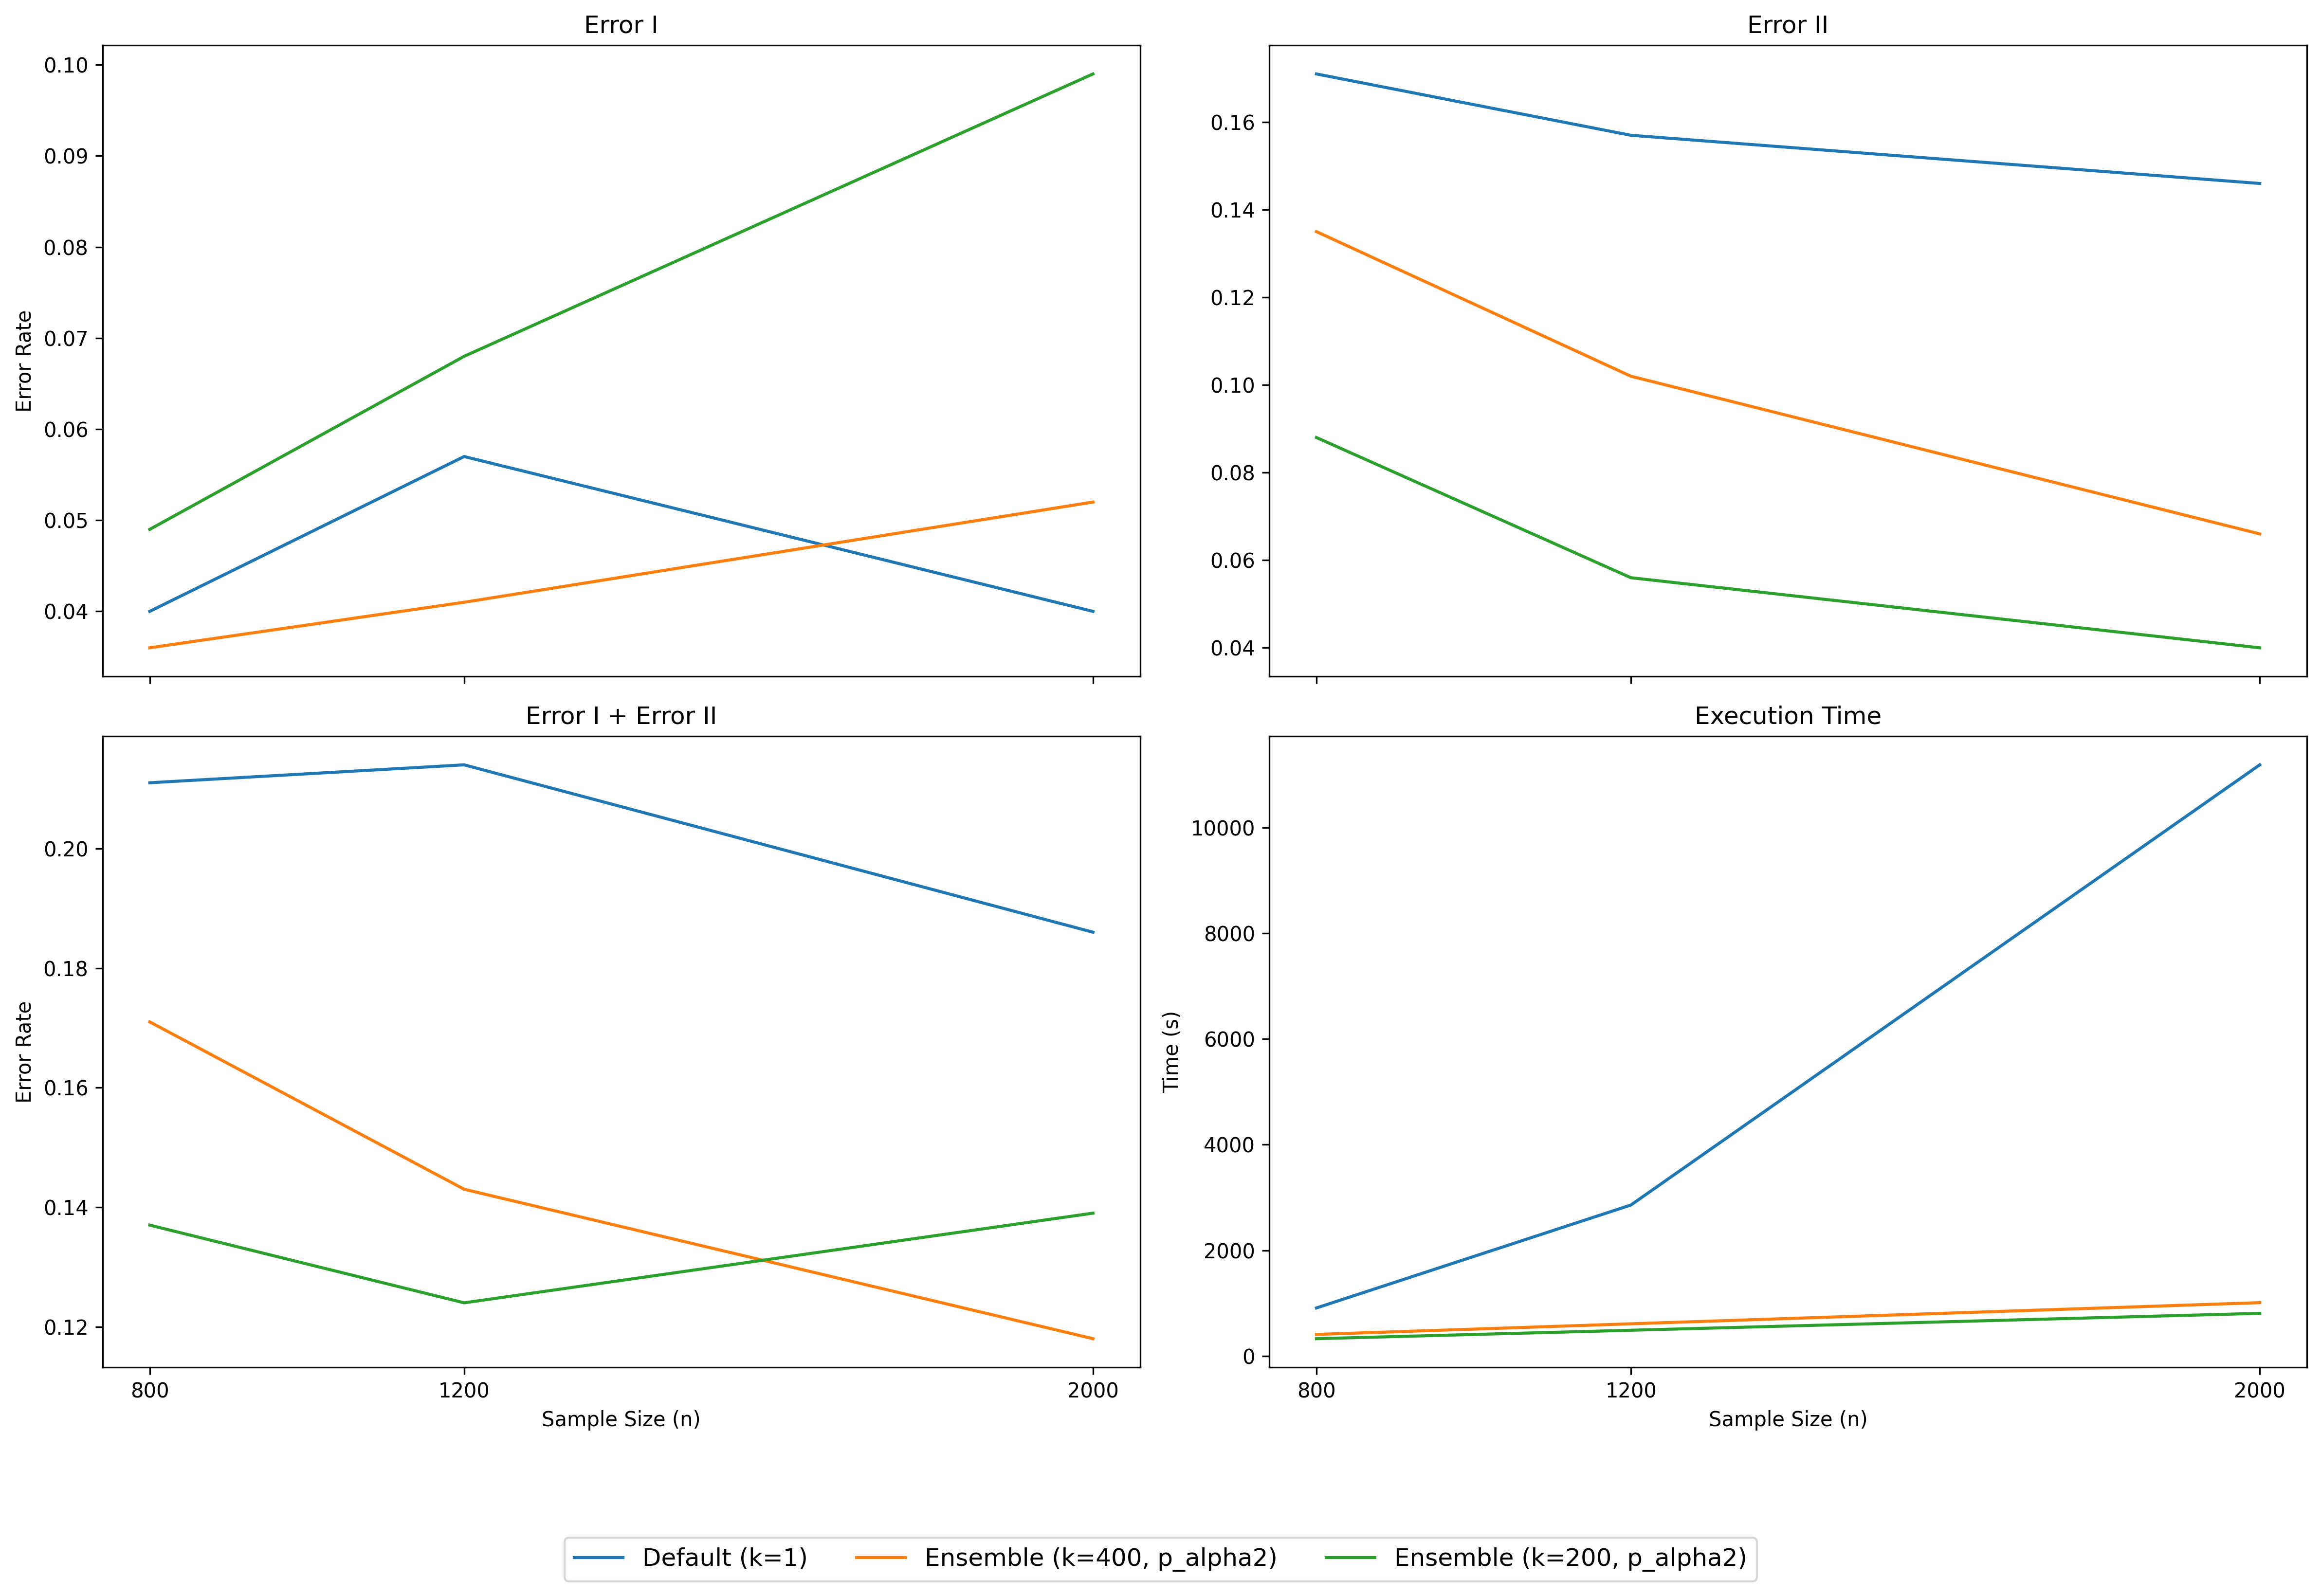

[[[0.04, 0.057, 0.04],
  [0.171, 0.157, 0.146],
  [909.0464901924133, 2856.18416762352, 11184.70506119728]],
 [[0.036, 0.041, 0.052],
  [0.135, 0.102, 0.066],
  [408.27690029144287, 609.1150097846985, 1009.3449630737305]],
 [[0.049, 0.068, 0.099],
  [0.088, 0.056, 0.04],
  [327.448801279068, 487.18151688575745, 807.1201815605164]]]

In [4]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=1,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=2000: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [3:01:20<00:00, 10.88s/it]


Ensemble (k=400, p_alpha2)


n=2000: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [16:24<00:00,  1.02it/s]


Ensemble (k=200, p_alpha2)


n=2000: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [12:54<00:00,  1.29it/s]


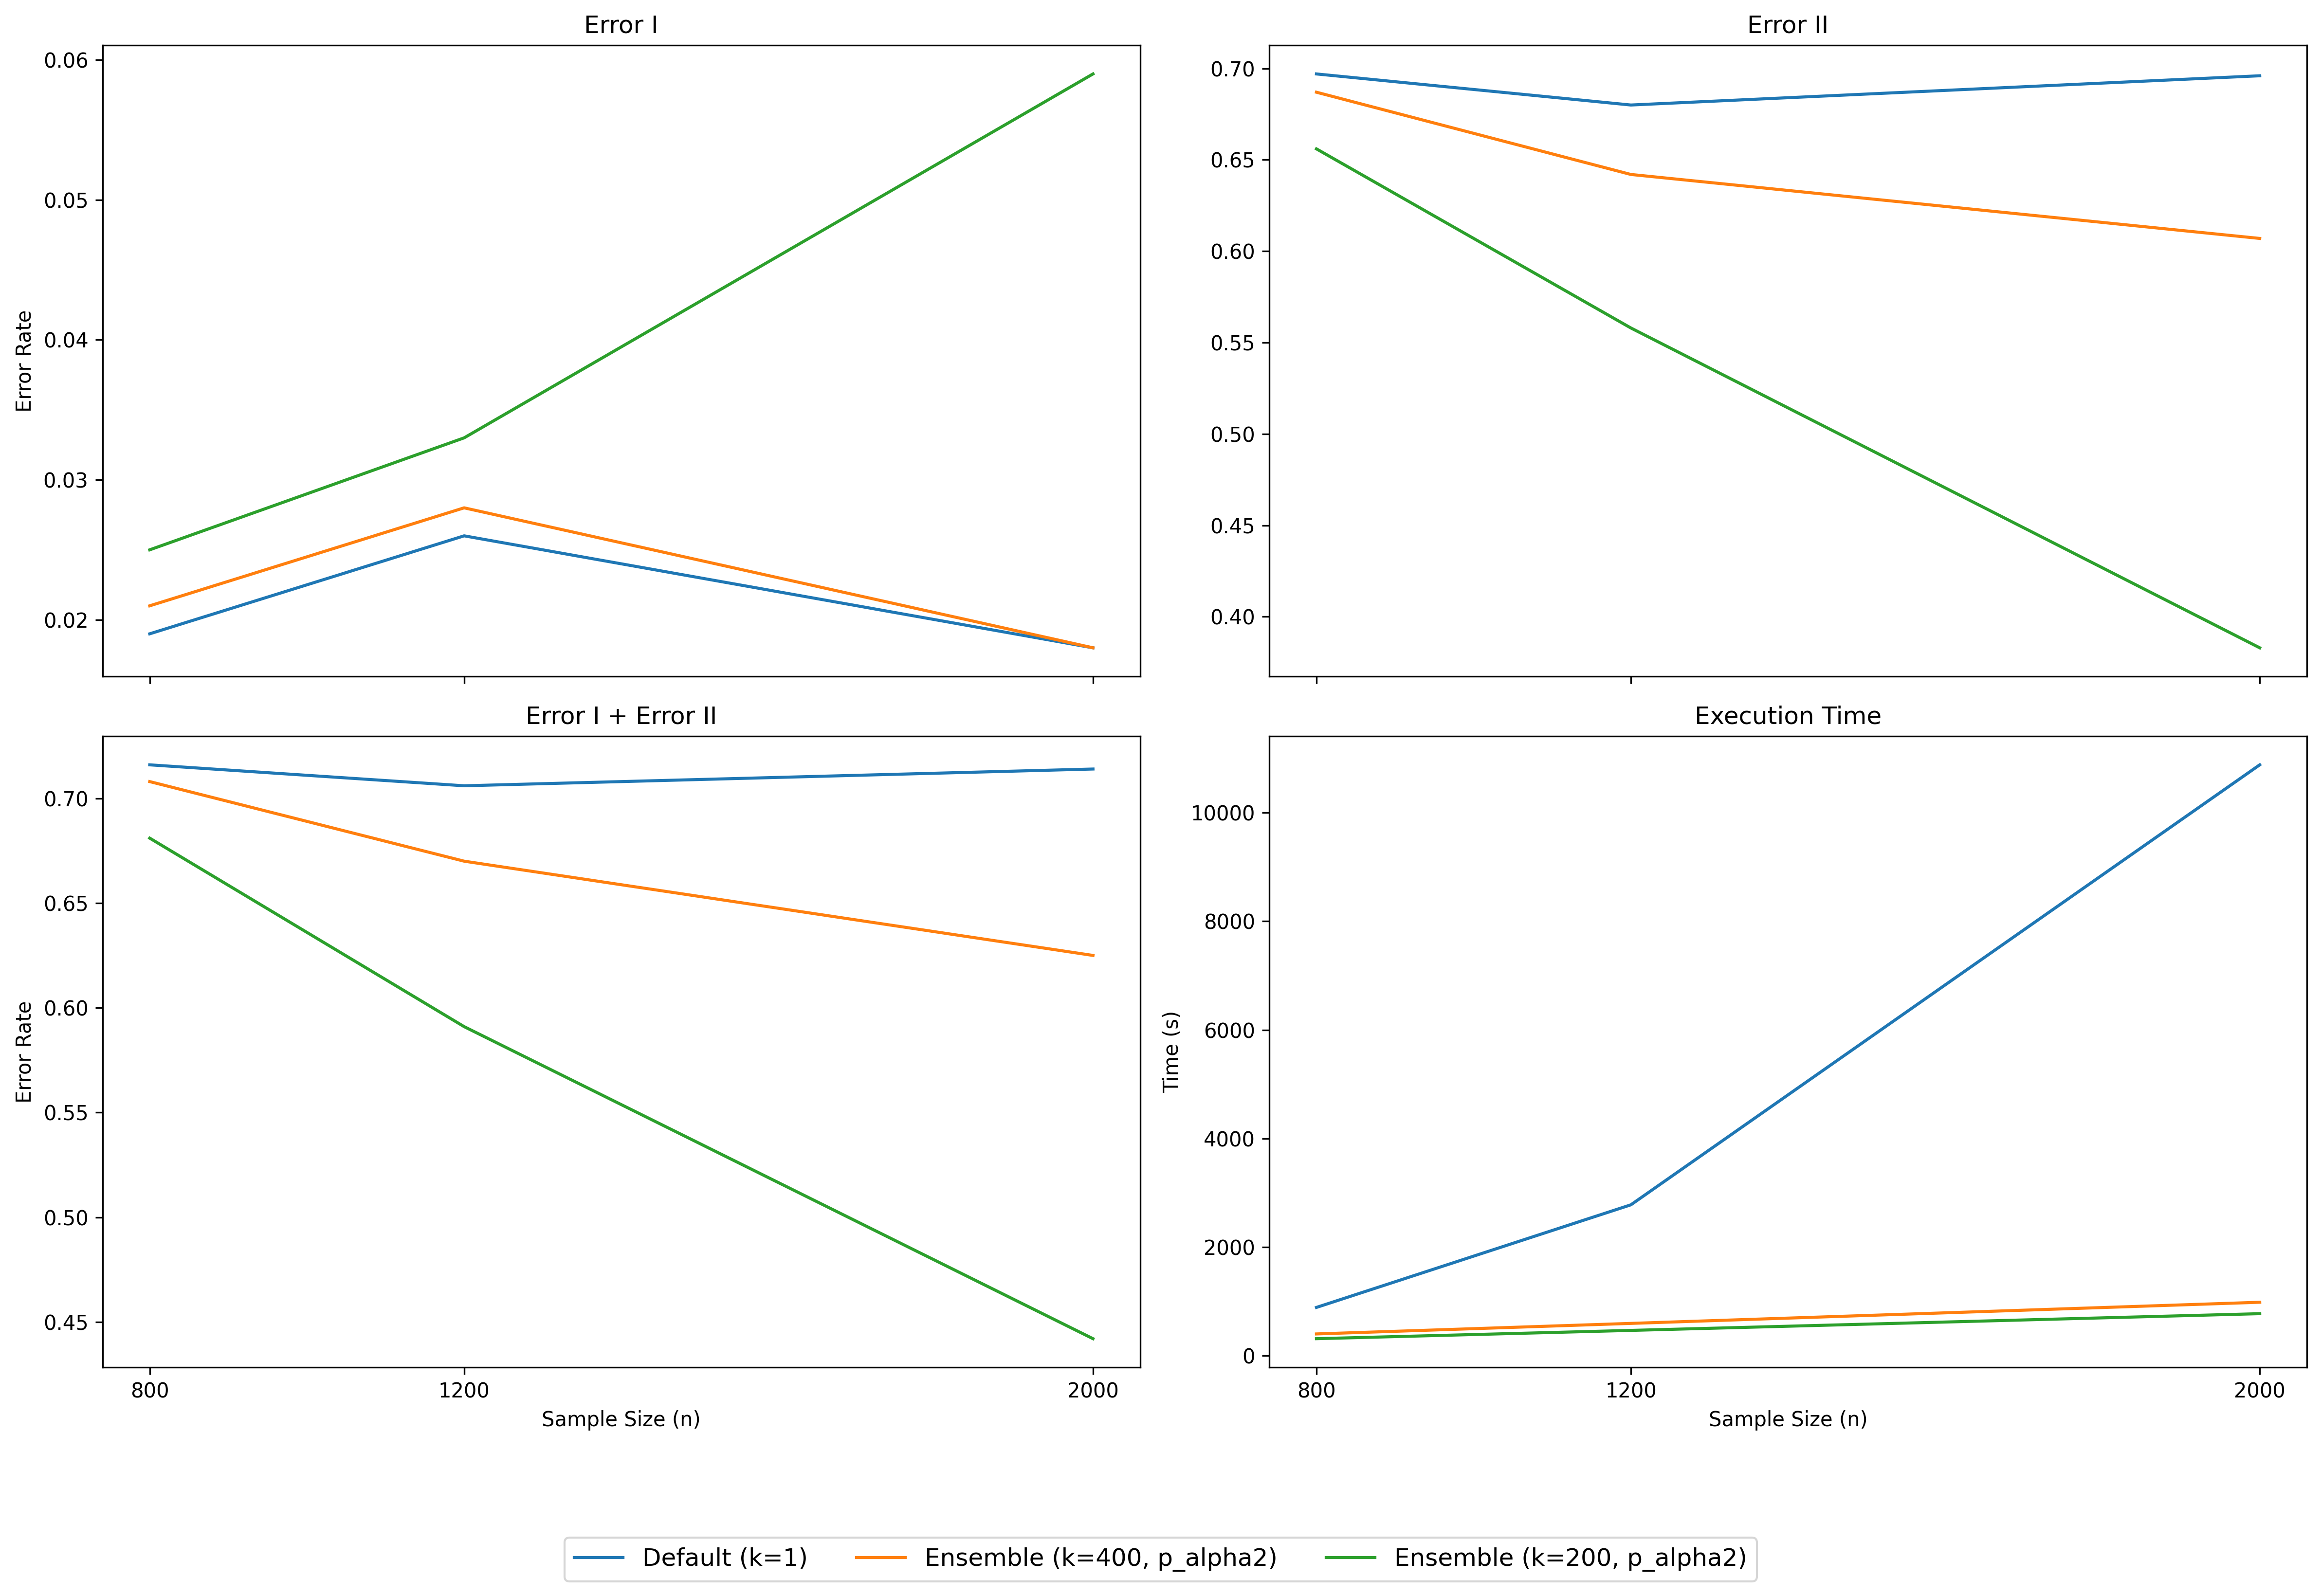

[[[0.019, 0.026, 0.018],
  [0.697, 0.68, 0.696],
  [889.8813214302063, 2779.027809858322, 10880.609010219574]],
 [[0.021, 0.028, 0.018],
  [0.687, 0.642, 0.607],
  [401.66845750808716, 595.7203512191772, 984.952507019043]],
 [[0.025, 0.033, 0.059],
  [0.656, 0.558, 0.383],
  [314.0378956794739, 466.7687828540802, 774.6450817584991]]]

In [5]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=1,z_dis='gaussian',noise_dis='cauchy',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=2000: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [3:09:59<00:00, 11.40s/it]


Ensemble (k=400, p_alpha2)


n=2000: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [17:03<00:00,  1.02s/it]


Ensemble (k=200, p_alpha2)


n=2000: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [13:40<00:00,  1.22it/s]


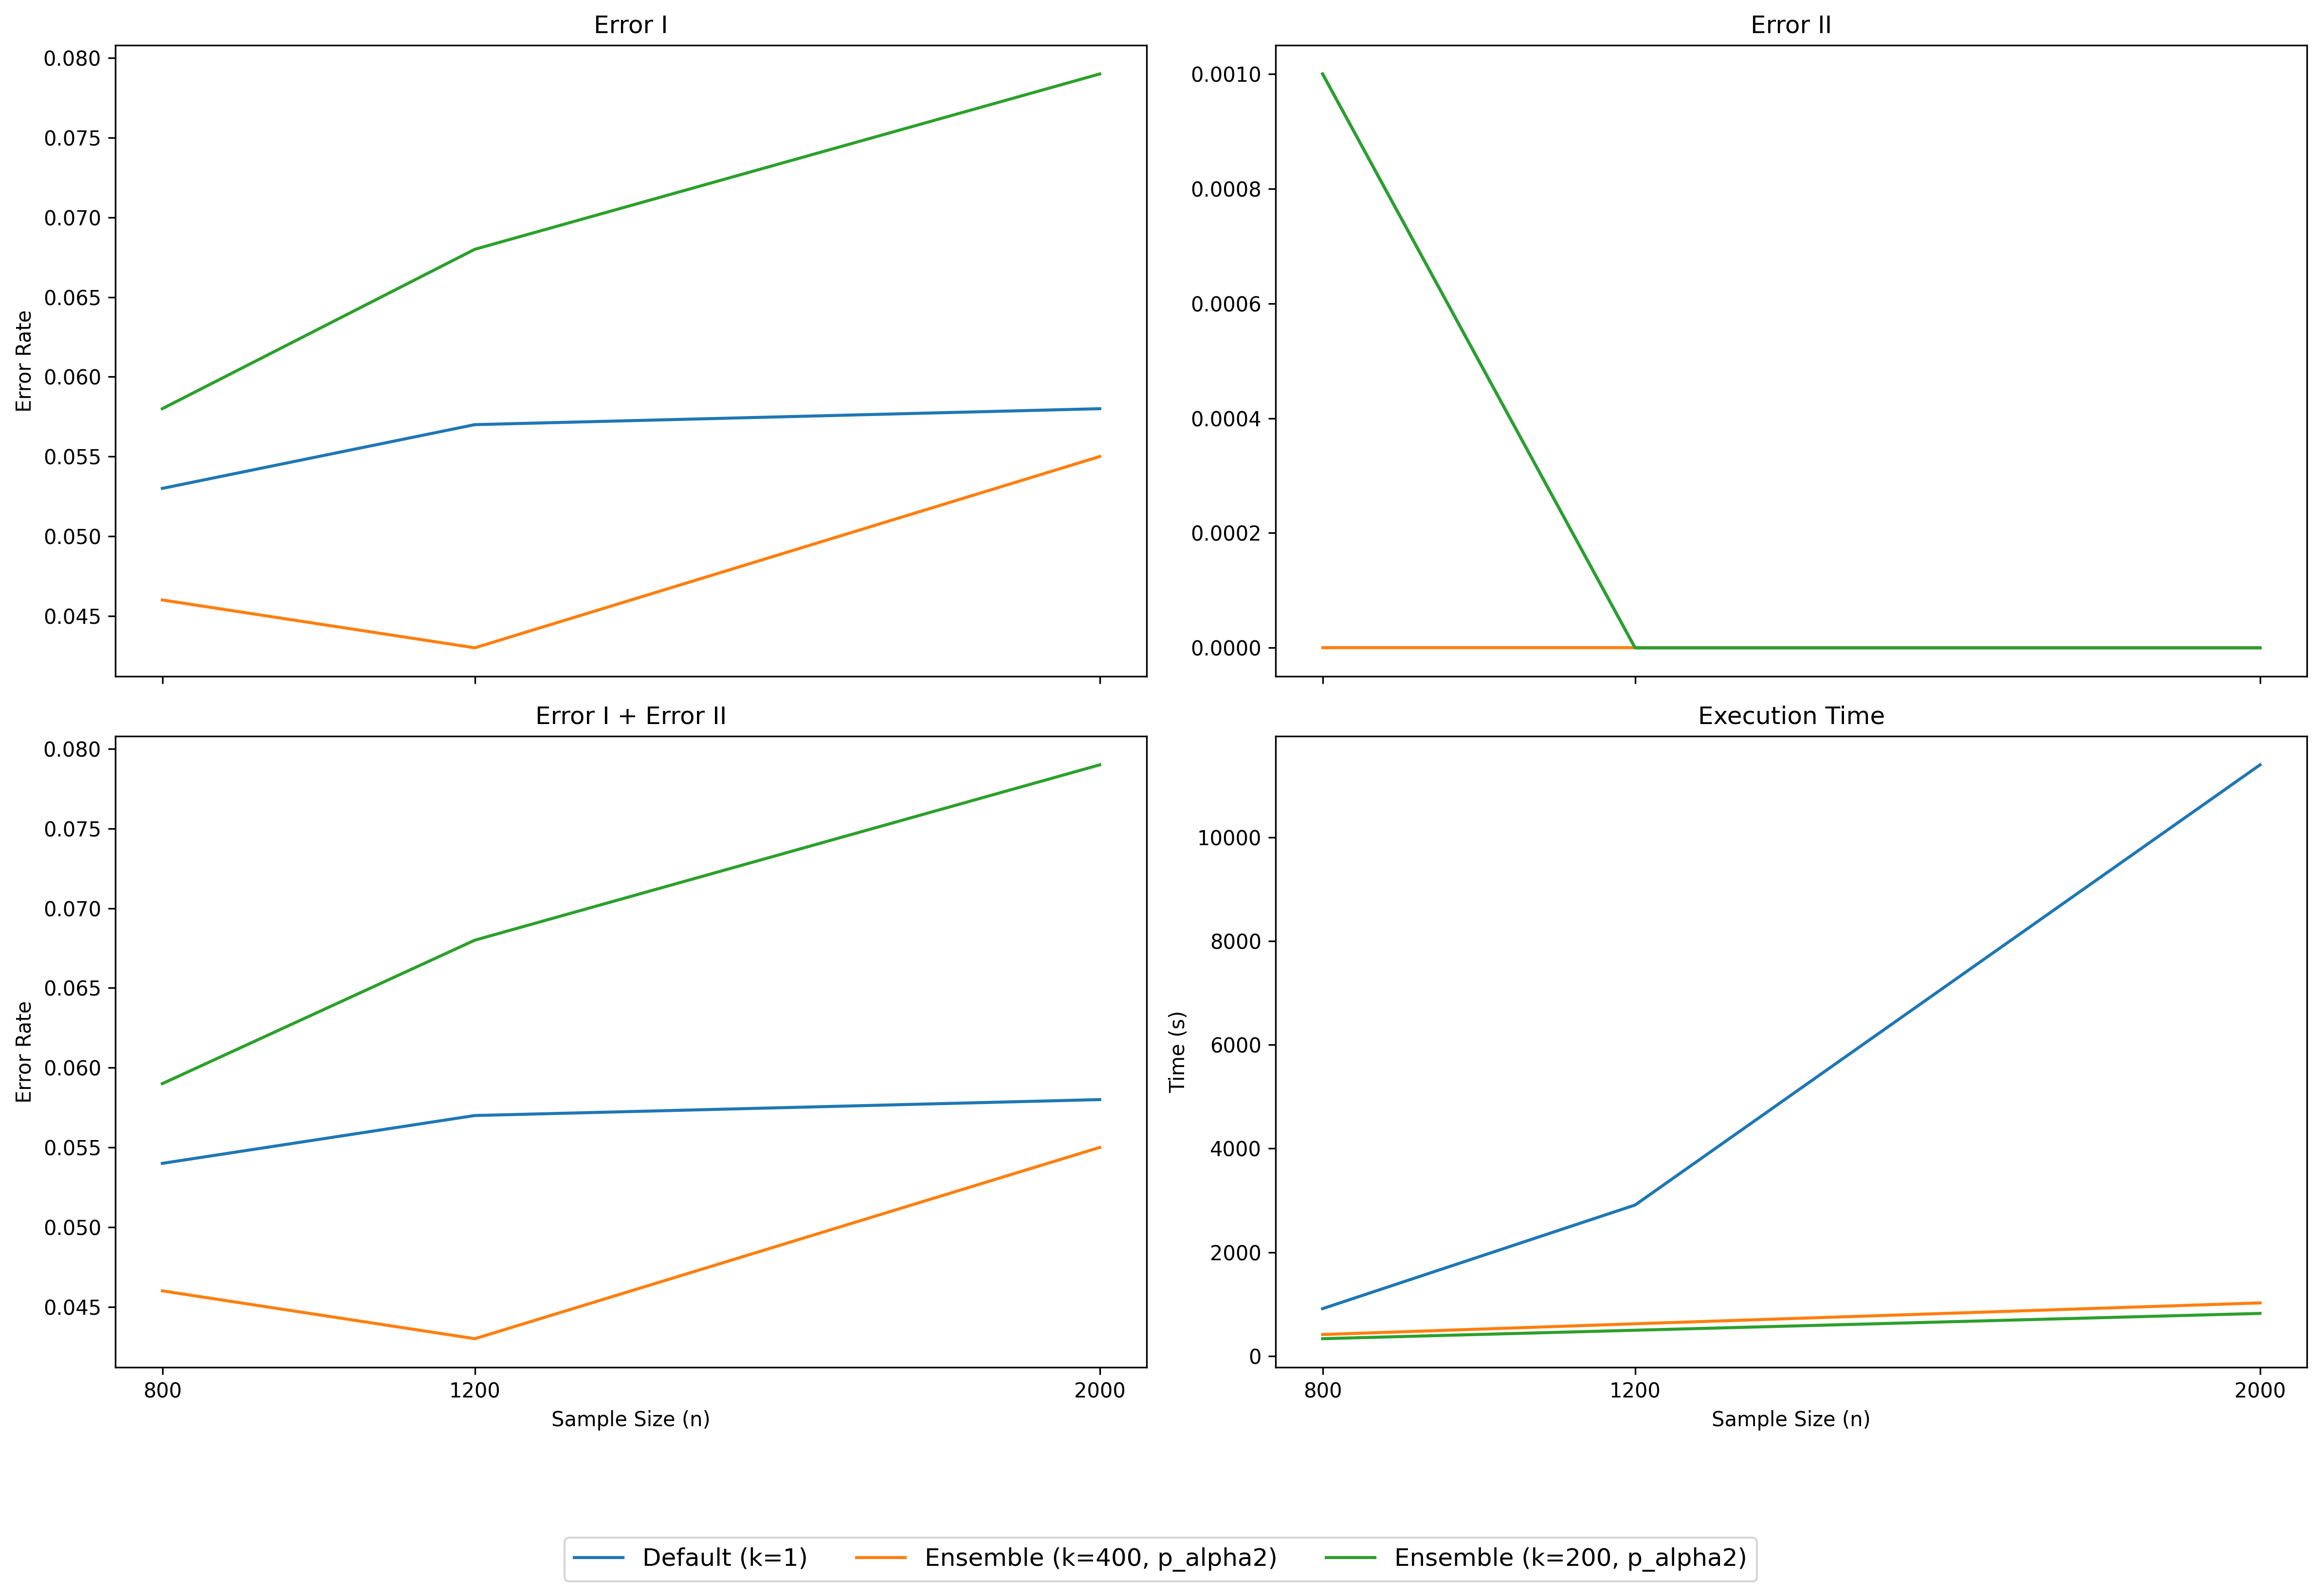

[[[0.053, 0.057, 0.058],
  [0.001, 0.0, 0.0],
  [912.9012446403503, 2911.030114889145, 11399.135481357574]],
 [[0.046, 0.043, 0.055],
  [0.0, 0.0, 0.0],
  [413.68823170661926, 621.1199769973755, 1023.7681879997253]],
 [[0.058, 0.068, 0.079],
  [0.001, 0.0, 0.0],
  [333.3875164985657, 496.54544281959534, 820.8116352558136]]]

In [6]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=1,z_dis='uniform',noise_dis='gaussian',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=2000: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [3:04:59<00:00, 11.10s/it]


Ensemble (k=400, p_alpha2)


n=2000: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [16:57<00:00,  1.02s/it]


Ensemble (k=200, p_alpha2)


n=2000: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [13:28<00:00,  1.24it/s]


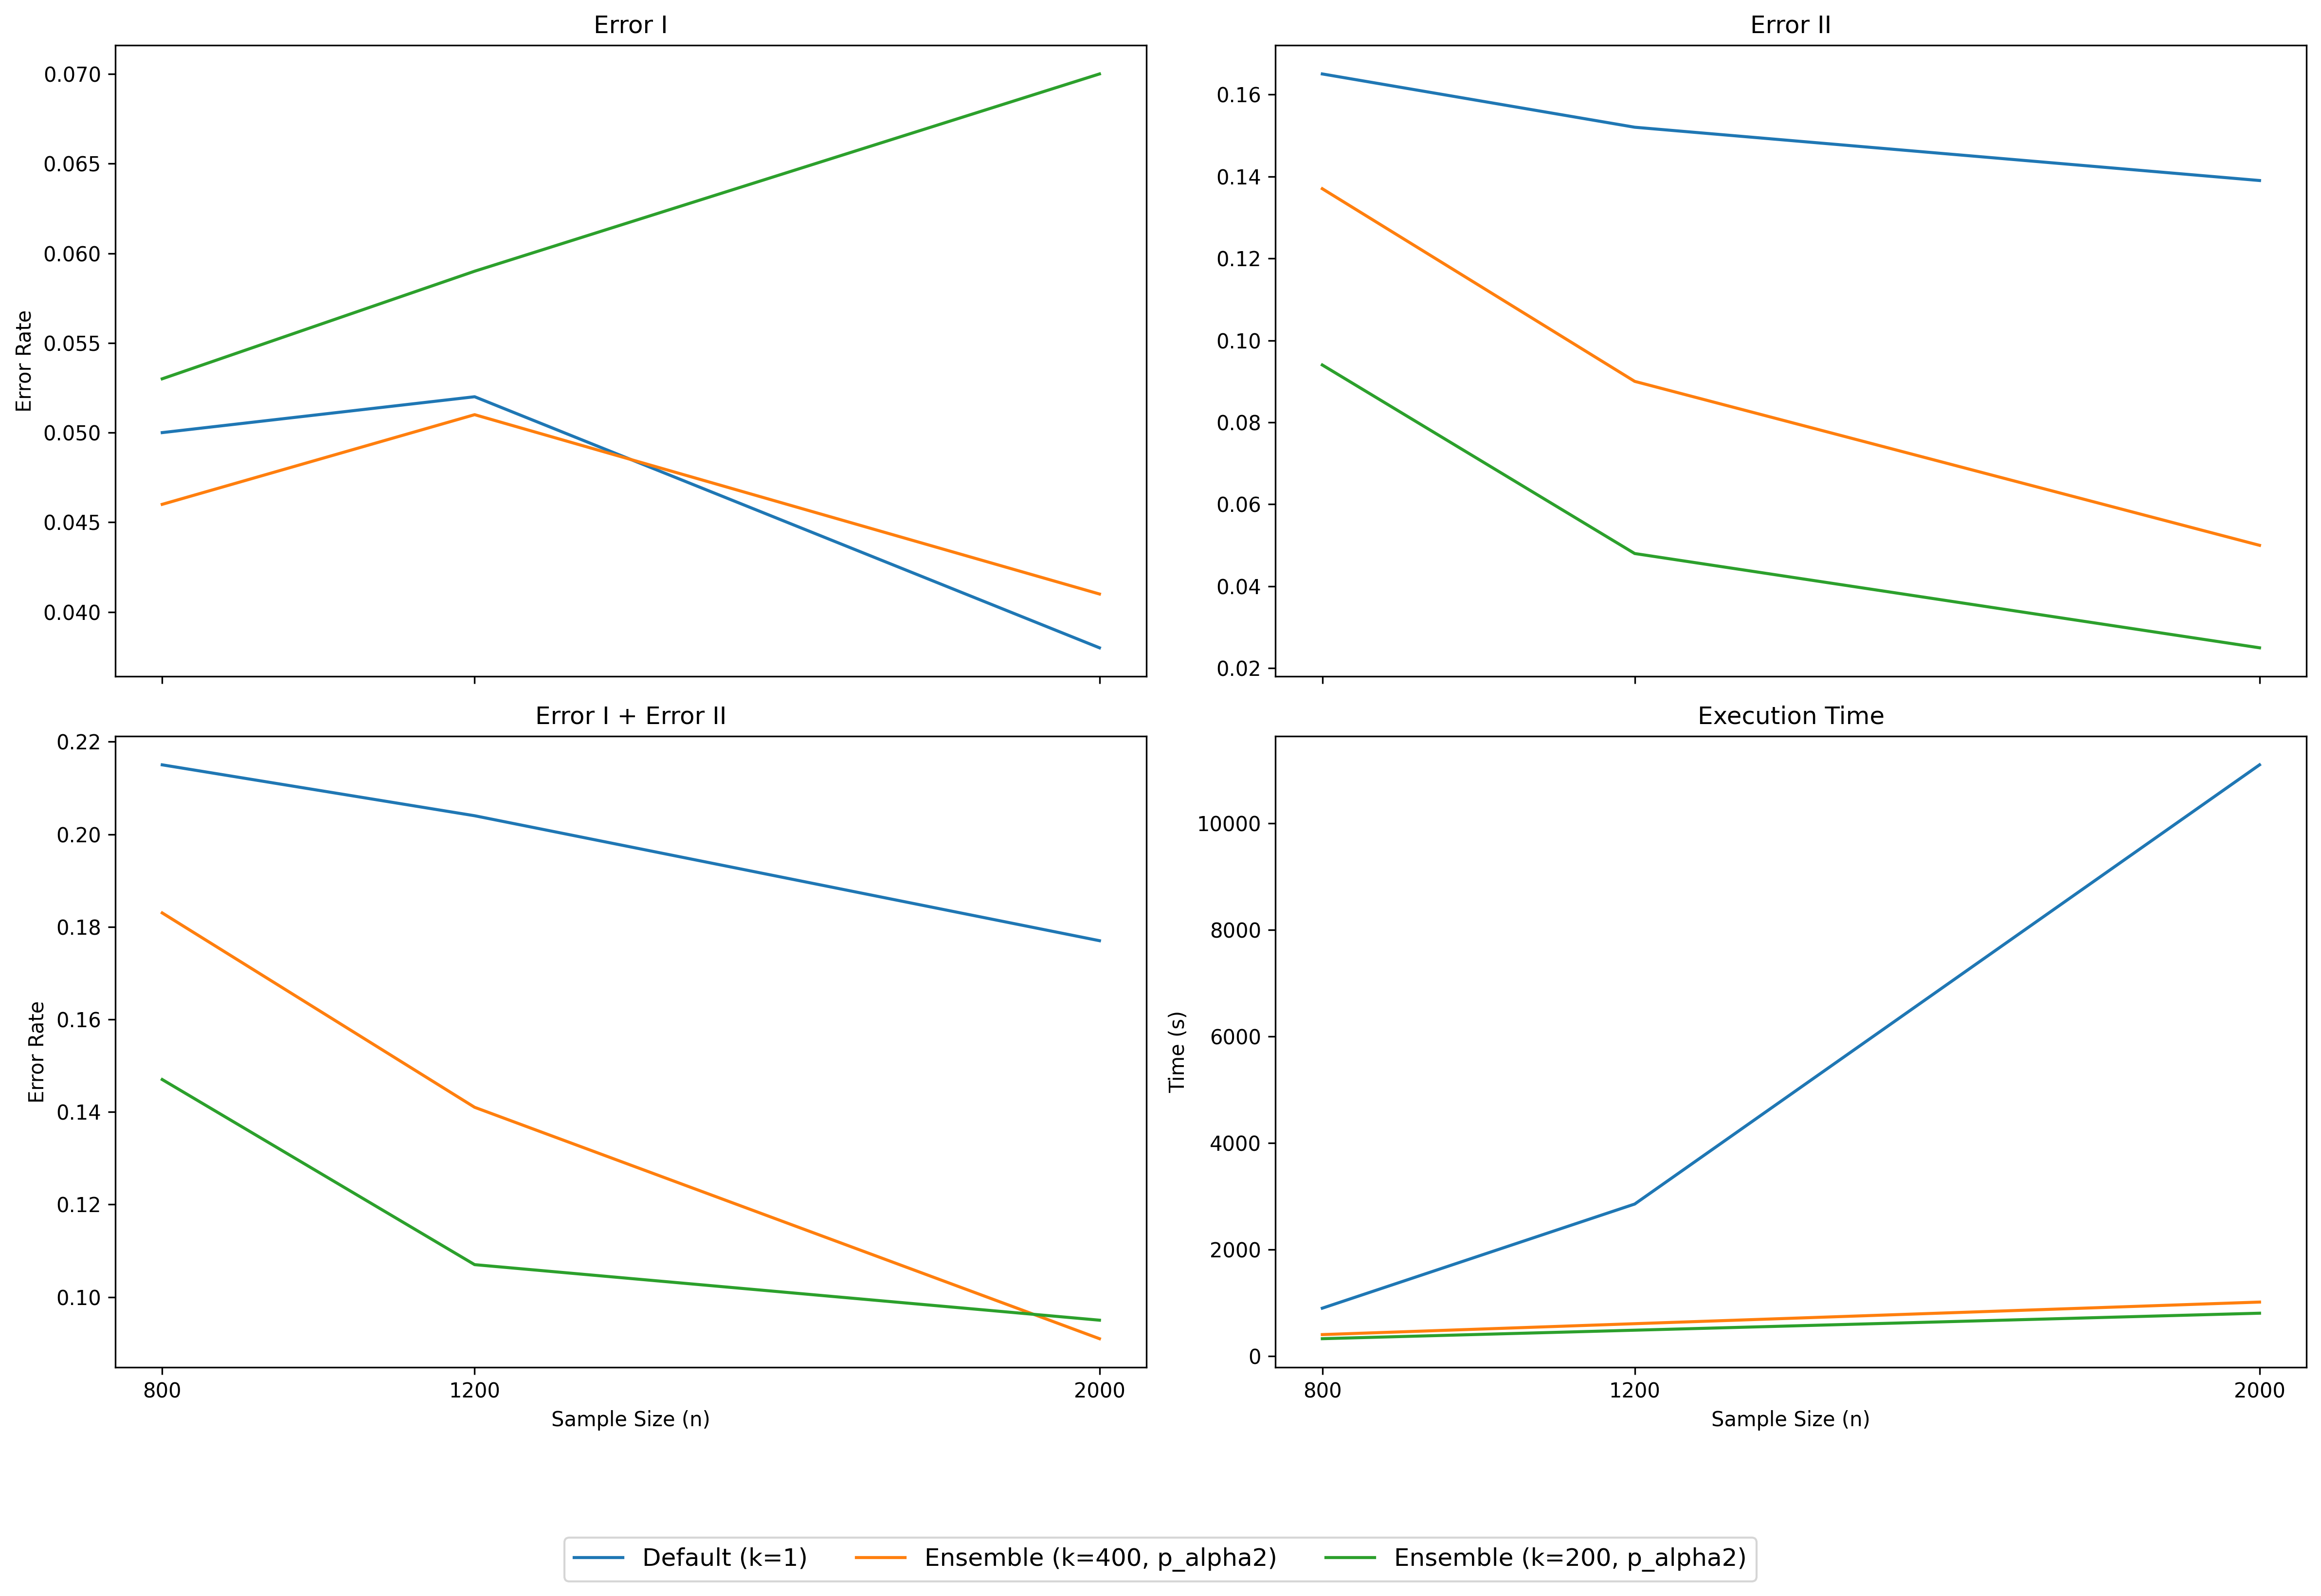

[[[0.05, 0.052, 0.038],
  [0.165, 0.152, 0.139],
  [902.4163737297058, 2856.83588719368, 11099.861955404282]],
 [[0.046, 0.051, 0.041],
  [0.137, 0.09, 0.05],
  [406.77626943588257, 611.2391204833984, 1017.1048808097839]],
 [[0.053, 0.059, 0.07],
  [0.094, 0.048, 0.025],
  [329.7157475948334, 489.2935755252838, 808.1777949333191]]]

In [7]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=1,z_dis='uniform',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=2000: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [3:01:16<00:00, 10.88s/it]


Ensemble (k=400, p_alpha2)


n=2000: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [16:25<00:00,  1.01it/s]


Ensemble (k=200, p_alpha2)


n=2000: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [12:59<00:00,  1.28it/s]


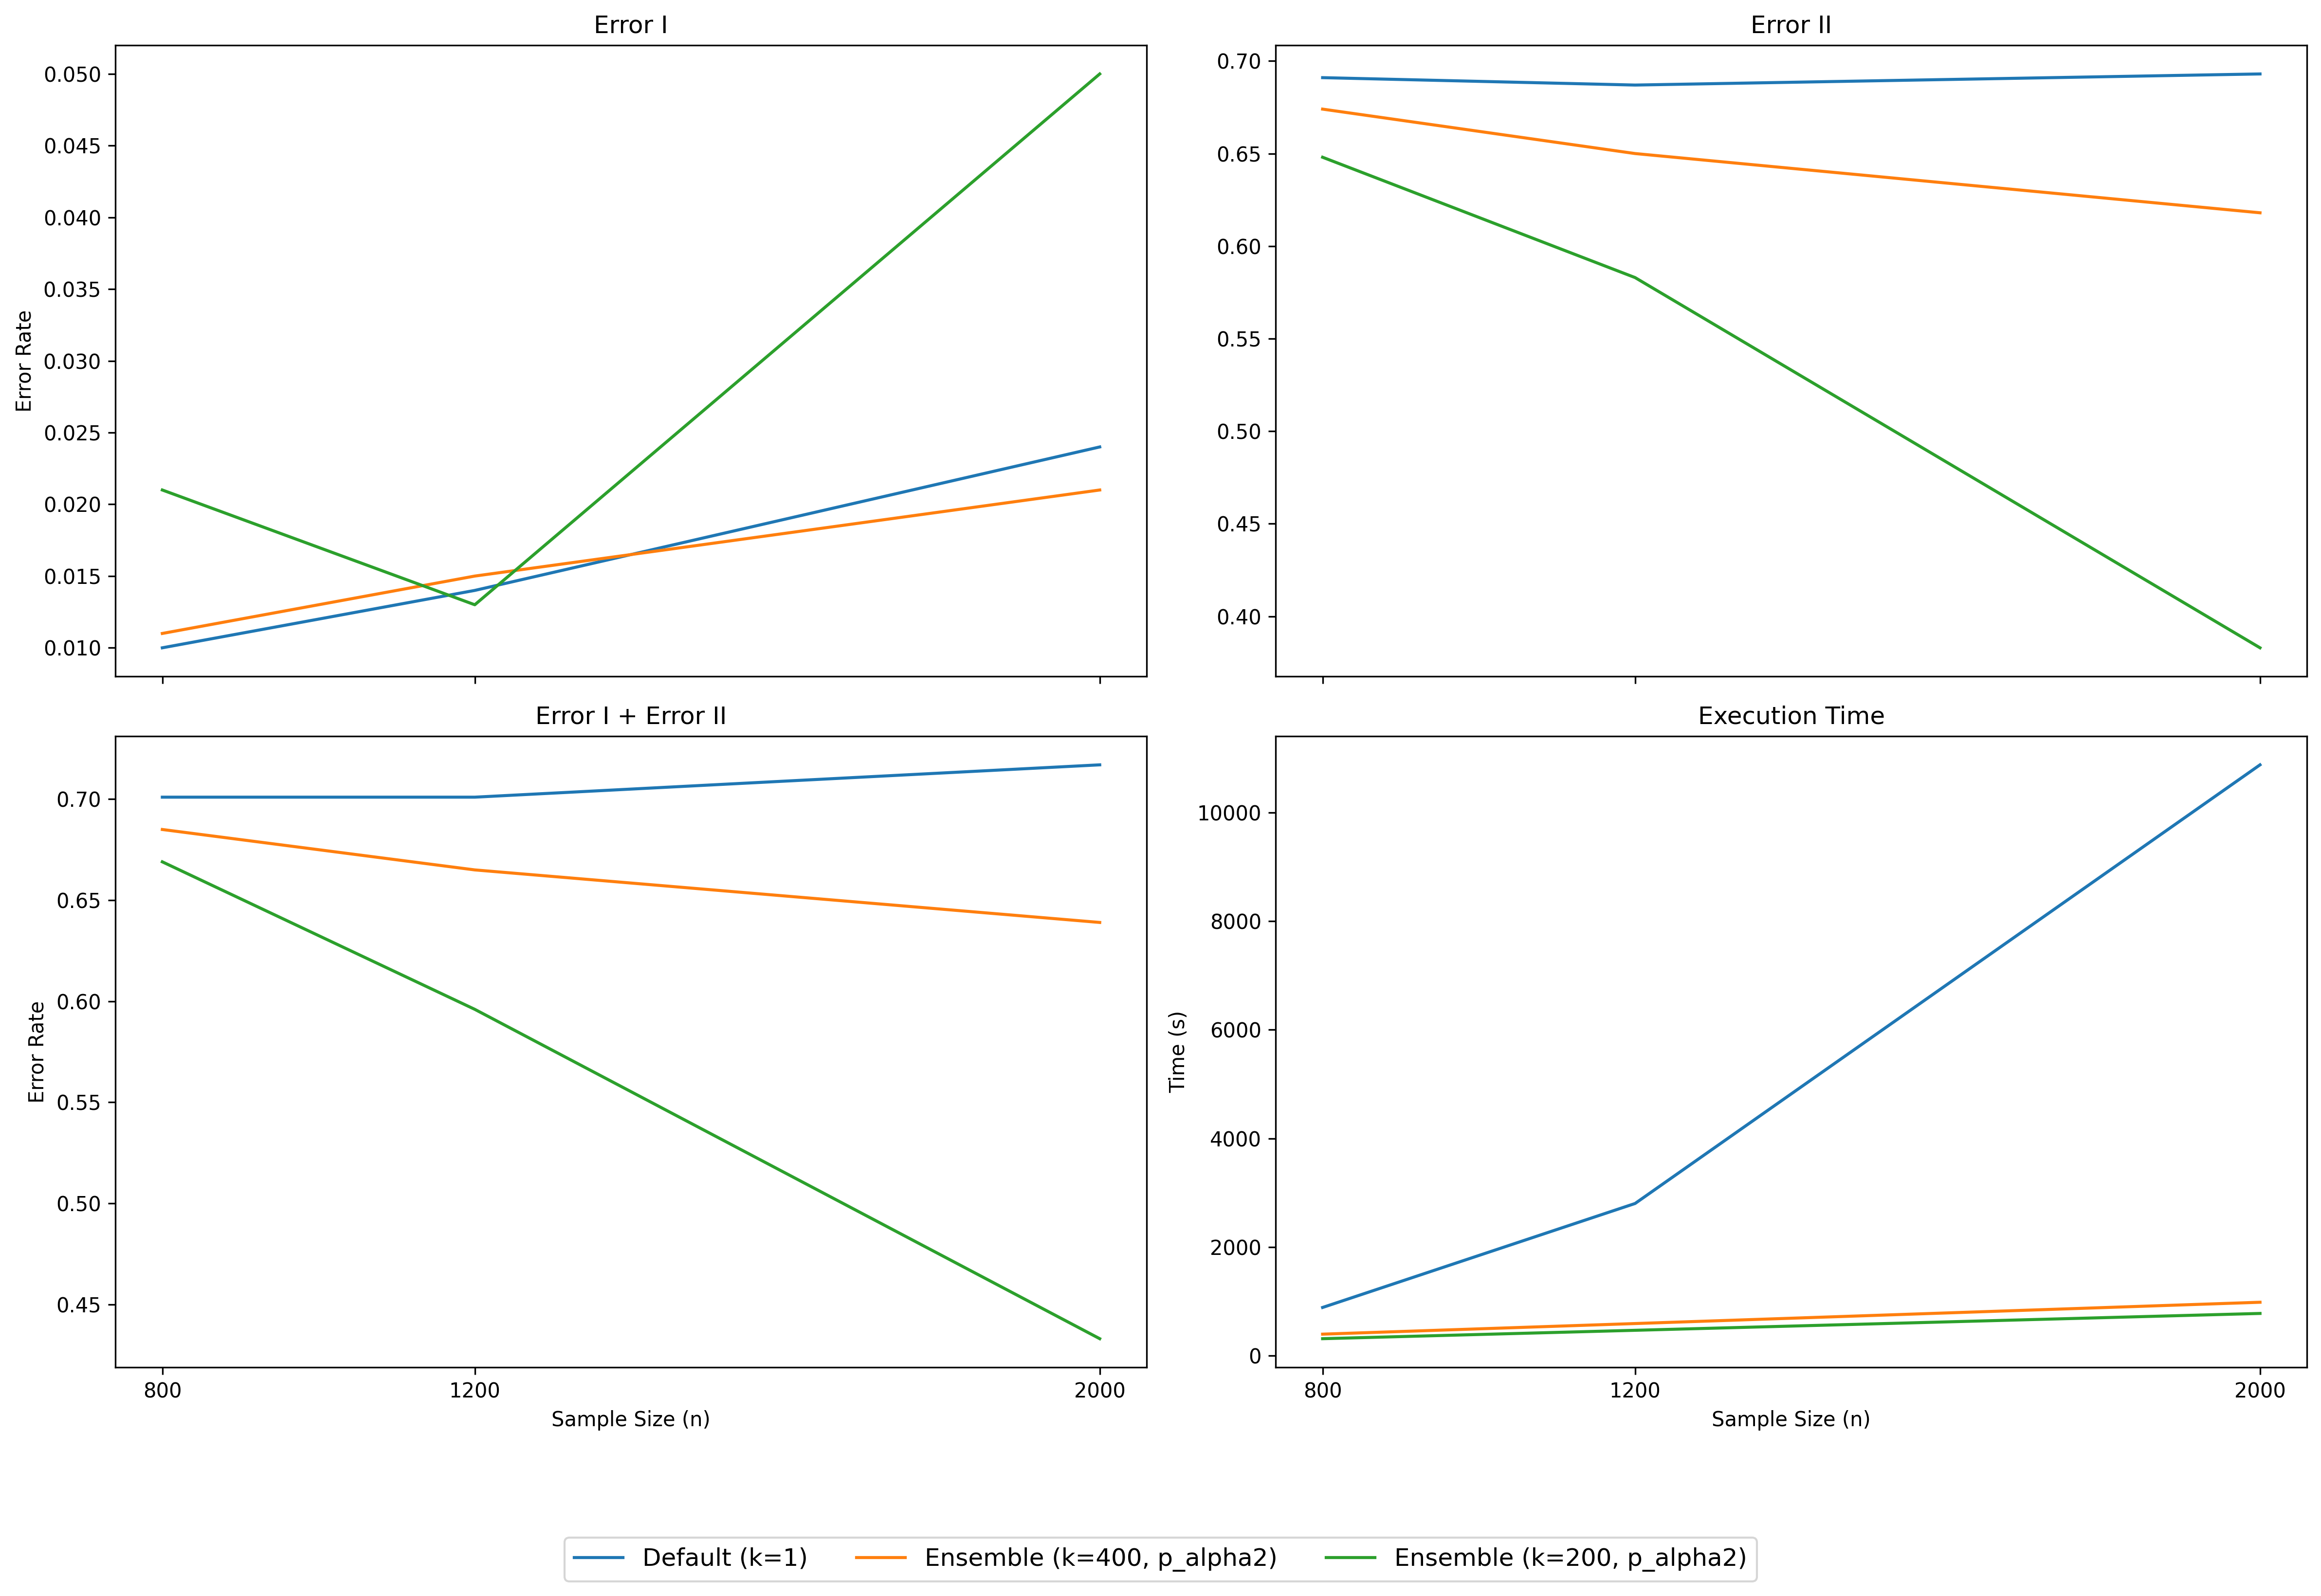

[[[0.01, 0.014, 0.024],
  [0.691, 0.687, 0.693],
  [889.5867831707001, 2803.0633020401, 10876.533024787903]],
 [[0.011, 0.015, 0.021],
  [0.674, 0.65, 0.618],
  [398.43797183036804, 593.494167804718, 985.4539711475372]],
 [[0.021, 0.013, 0.05],
  [0.648, 0.583, 0.383],
  [314.7705078125, 469.401570558548, 779.5652115345001]]]

In [8]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=1,z_dis='uniform',noise_dis='cauchy',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results